05_support_vector_mechines

# 线性SVM分类

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd 

In [569]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM模型
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

In [570]:
svm_clf.intercept_, svm_clf.coef_, svm_clf.support_vectors_

(array([-3.78823471]),
 array([[1.29411744, 0.82352928]]),
 array([[1.9, 0.4],
        [3. , 1.1]]))

In [571]:
np.linspace(0, 5, 5)

array([0.  , 1.25, 2.5 , 3.75, 5.  ])

**支持向量：** 在街道以外的地方添加更多的实例，不会对决策边界产生影响：也就是说它完全位于街道边缘的实例所决定（或者称之为“支持”）。这些实例被称之为*支持向量*。（`svm_clf.support_vectors_`）

In [572]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    """svm的决策边界"""
    x0 = np.linspace(xmin, xmax, 200)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # 决策边界：w0*x + w1*y + b = 0  ==> y = - w0 / w1 * x - b / w1
    decision_boundary = - w[0] / w[1] * x0 - b / w[1]
    margin = 1 / w[1]   # ?????  """TODO"""
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # 支持向量：
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth = 2)
    plt.plot(x0, gutter_up, "k--", linewidth = 2)
    plt.plot(x0, gutter_down, "k--", linewidth = 2)

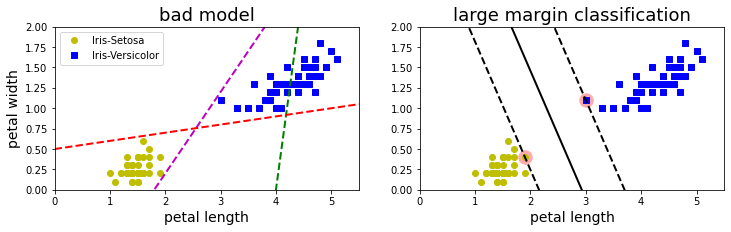

In [573]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# 绘图
plt.figure(figsize=(12, 3))
plt.subplot(121)
# setosa鸢尾花
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
# versicolor
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
# bad model--decision boundary
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m--", linewidth=2)
plt.plot(x0, pred_3, "r--", linewidth=2)

plt.title("bad model", fontsize=18)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend(loc="upper left", fontsize=10)

plt.subplot(122)
# setosa鸢尾花
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris-Setosa")
# versicolor
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris-Versicolor")
# svm--decidion_boundary
plot_svc_decision_boundary(svm_clf, 0, 5.5)    
plt.title("large margin classification", fontsize=18)
plt.xlabel("petal length", fontsize=14)
# plt.ylabel("petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
# plt.legend(loc="upper left", fontsize=10)

plt.show()


**Sensitivity to feature scales**

(-2.0, 2.0, -2.0, 2.0)

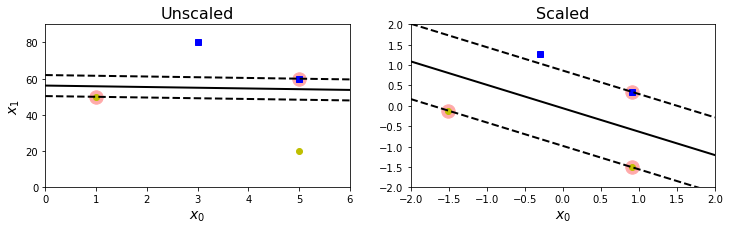

In [574]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# SVM模型
svm_clf = SVC(kernel="linear", C = 100)
svm_clf.fit(Xs, ys)

# 绘图
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], "yo")
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], "bs")
plot_svc_decision_boundary(svm_clf, 0, 6)

plt.xlabel("$x_0$", fontsize = 14)
plt.ylabel("$x_1$", fontsize = 14)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# 进行缩放
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
Xs_scaled = std_scaler.fit_transform(Xs)
svm_clf.fit(Xs_scaled, ys)

# 绘图
plt.subplot(122)
plt.plot(Xs_scaled[:, 0][ys == 0], Xs_scaled[:, 1][ys == 0], "yo")
plt.plot(Xs_scaled[:, 0][ys == 1], Xs_scaled[:, 1][ys == 1], "bs")
plot_svc_decision_boundary(svm_clf, -2, 2)

plt.xlabel("$x_0$", fontsize = 14)
# plt.ylabel("$x_1$", fontsize = 14)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])


In [575]:
Xs_scaled, Xs_scaled[:, 0].max(), Xs_scaled[:, 0].min(), Xs_scaled[:, 1].max(), Xs_scaled[:, 1].min()

(array([[-1.50755672, -0.11547005],
        [ 0.90453403, -1.5011107 ],
        [-0.30151134,  1.27017059],
        [ 0.90453403,  0.34641016]]),
 0.9045340337332909,
 -1.507556722888818,
 1.2701705922171767,
 -1.501110699893027)

## 软间隔分类

**硬间隔分类：** 如果我们严格的让所有实例都不在街道上，并且位于正确的一边，这就是硬间隔分类。

硬间隔分类存在两个主要问题：
- 他只在数据是线性可分离时有效；
- 他对异常值特别敏感

Sensitivity to outliers


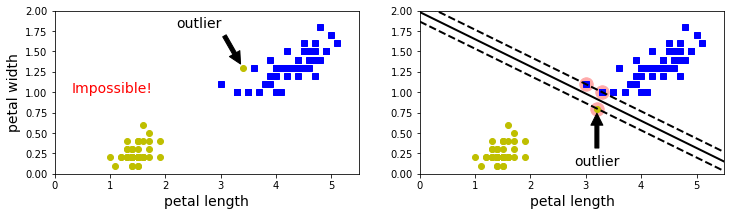

In [579]:
# 初始化异常数据
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

# 训练模型
svm_clf1 = SVC(kernel="linear", C=10**9)
svm_clf1.fit(Xo1, yo1)
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

# 绘图
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo", label = "Iris-Setosa")
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs", label = "Iris-Versicolor")
# plot_svc_decision_boundary(svm_clf1, 0, 5.5)

plt.text(0.3, 1, "Impossible!", fontsize=14, color="red")
# 异常值 标注
plt.annotate("outlier", 
            xy = (X_outliers[0][0], X_outliers[0][1]),
            xytext = (X_outliers[0][0] - 0.8, X_outliers[0][1] + 0.5),
            # 箭头
            arrowprops = dict(facecolor = "black", shrink = 0.1),
            ha = "center",
            fontsize = 14)

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])


plt.subplot(122)
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo", label="Iris-Setosa")
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs", label="Iris-versicolor")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
# 异常值 标注
plt.annotate("outlier",
            xy=(X_outliers[1][0], X_outliers[1][1]),
            xytext=(X_outliers[1][0], X_outliers[1][1] - 0.7),
            # 箭头
            arrowprops=dict(facecolor="black", shrink=0.1),
            ha="center",
            fontsize=14)


plt.xlabel("petal length", fontsize=14)
# plt.ylabel("petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])

print("Sensitivity to outliers")
plt.show()

**Large margin vs margin violations|**

In [123]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-virginica

svm_clf = Pipeline([
    ("std_scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42))])

svm_clf.fit(X, y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [126]:
y, len(y)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 150)

In [116]:
# 预测
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [173]:
# 设置不同的超参数C，来进行对比
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)
scaler = StandardScaler()

svm_clf1_scaled = Pipeline([
    ("std_scaler", scaler),
    ("linear_svm", svm_clf1)
])
svm_clf2_scaled = Pipeline([
    ("std_scaler", scaler),
    ("linear_svm", svm_clf2)
])

svm_clf1_scaled.fit(X, y)
svm_clf2_scaled.fit(X, y)

# svm_clf1 = SVC(C=1, kernel="linear", random_state=42)
# svm_clf2 = SVC(C=100, kernel="linear", random_state=42)


# std_scaler = StandardScaler()
# X_scaled = std_scaler.fit_transform(X)

# svm_clf1_scaled = svm_clf1.fit(X_scaled, y)
# svm_clf2_scaled = svm_clf2.fit(X_scaled, y)

C:\Users\sunny\Envs\m_envs\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('linear_svm',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

### Convert to unscaled parameters???

In [177]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

In [178]:
# 特征平均值
print("scaler.mean_", scaler.mean_)
# 特征的相对缩放
print("scaler.scale_", scaler.scale_)
print("b1", b1)
print("w1", w1)
print("C = ", svm_clf2.C)

scaler.mean_ [3.758      1.19933333]
scaler.scale_ [1.75940407 0.75969263]
b1 [-9.76355008]
w1 [0.92831448 3.14319431]
C =  100


(4.0, 6.0, 0.8, 2.8)

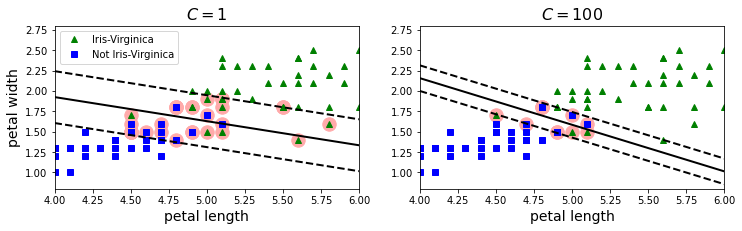

In [179]:
# 绘图
plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Not Iris-Virginica")
plot_svc_decision_boundary(svm_clf1, 4, 6)

plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.legend(loc="upper left")
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Not Iris-Virginica")
plot_svc_decision_boundary(svm_clf2, 4, 6)

plt.xlabel("petal length", fontsize=14)
# plt.ylabel("petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
# plt.legend(loc="upper left")
plt.axis([4, 6, 0.8, 2.8])

# 非线性SVM分类

(-4.5, 4.5, -1.0, 17.0)

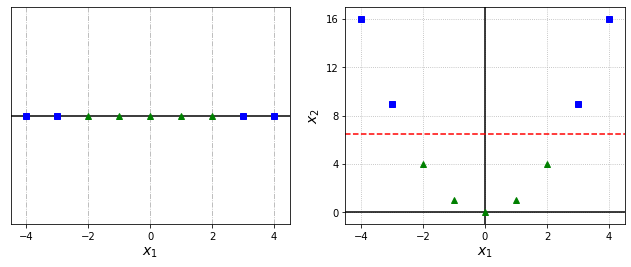

In [202]:
# 通过添加特征使数据集线性可分离
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
# 网格
plt.grid(True, which="both", linestyle='-.')
# y = 0这条线
plt.axhline(y = 0, color = "k")
plt.plot(X1D[:][y == 0], np.zeros(4), "bs")
plt.plot(X1D[:][y == 1], np.zeros(5), "g^")
#  no yaxis ticks
# plt.gca().get_yaxis().set_ticks([])
plt.yticks([])
plt.xticks([-4, -2, 0, 2, 4])
plt.xlabel("$x_1$", fontsize=14)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
# 网格
plt.grid(True, which="both", linestyle=':')
# y = 0这条线
plt.axhline(y = 0, color = "k")
plt.axvline(x = 0, color = "k")
plt.plot(X2D[:, 0][y == 0], X2D[:, 1][y == 0], "bs")
plt.plot(X2D[:, 0][y == 1], X2D[:, 1][y == 1], "g^")
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--")
#  no yaxis ticks
# plt.gca().get_yaxis().set_ticks([])
plt.yticks([0, 4, 8, 12, 16])
plt.xticks([-4, -2, 0, 2, 4])
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.axis([-4.5, 4.5, -1, 17])



In [207]:
from sklearn.datasets import make_moons

# 卫星数据集
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [210]:
def plot_dataset(X, y, axes):
    """绘图"""
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")

    plt.grid(True, which="both", linestyle=":")
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20)

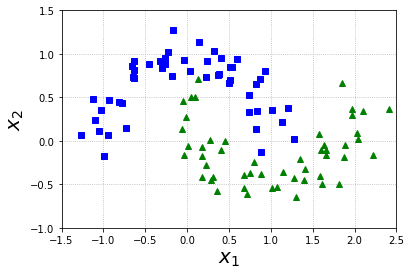

In [211]:
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

C:\Users\sunny\Envs\m_envs\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [230]:
def plot_predictions(clf, axes):
    """绘制预测结果"""
    X0s = np.linspace(axes[0], axes[1], 100)
    X1s = np.linspace(axes[2], axes[3], 100)
    
    X0, X1 = np.meshgrid(X0s, X1s)
    X = np.c_[X0.ravel(), X1.ravel()]
    
    y_pred = clf.predict(X).reshape(X0.shape)
    y_decision = clf.decision_function(X).reshape(X0.shape)
    
    # 填充
    plt.contourf(X0, X1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(X0, X1, y_decision, cmap=plt.cm.brg, alpha=0.1)

用多项式特征的线性LVM分类器


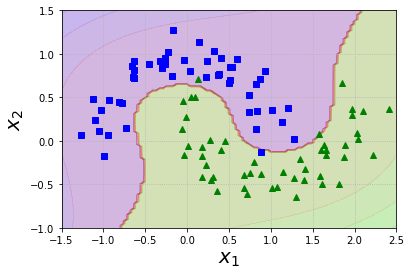

In [231]:
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1.0, 1.5])
print("用多项式特征的线性LVM分类器")

## 多项式核

In [233]:
from sklearn.svm import SVC

# 3阶多核（1）
poly_kernel_svm_clf_3_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=3, coef0=1, C=5))
])
# 3阶多核（100）
poly_kernel_svm_clf_3_100 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=3, coef0=100, C=5))
])
# 10阶多核（1）
poly_kernel_svm_clf_10_1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=3, coef0=1, C=5))
])
# 10阶多核（100）
poly_kernel_svm_clf_10_100 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="poly", degree=10, coef0=100, C=5))
])

poly_kernel_svm_clf_3_1.fit(X, y)
poly_kernel_svm_clf_3_100.fit(X, y)
poly_kernel_svm_clf_10_1.fit(X, y)
poly_kernel_svm_clf_10_100.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

多项式核的SVM分类器


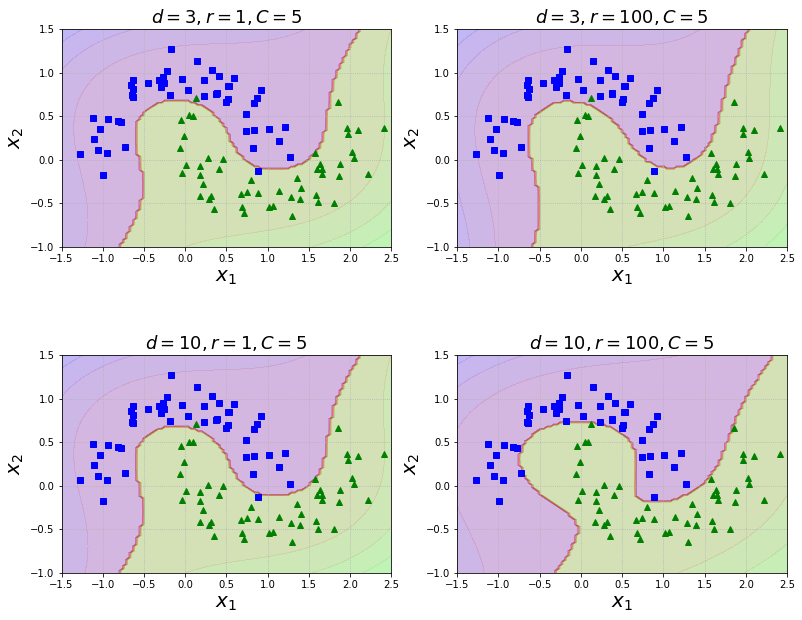

In [288]:
plt.figure(figsize=(13, 10))
plt.tight_layout()  # 调整整体空白
plt.subplots_adjust(wspace=None, hspace=0.5)  # 调整子图间距

plt.subplot(221)
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(poly_kernel_svm_clf_3_1, [-1.5, 2.5, -1.0, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(222)
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(poly_kernel_svm_clf_3_100, [-1.5, 2.5, -1.0, 1.5])
plt.title(r"$d=3, r=100, C=5$", fontsize=18)

plt.subplot(223)
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(poly_kernel_svm_clf_10_1, [-1.5, 2.5, -1.0, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)

plt.subplot(224)
plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
plot_predictions(poly_kernel_svm_clf_10_100, [-1.5, 2.5, -1.0, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# plt.show()
print("多项式核的SVM分类器")

## 添加相似特征

In [289]:
def gaussian_rbf(x, landmark, gamma):
    """高斯RBF"""
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1) ** 2)

用高斯BRF的相似特征


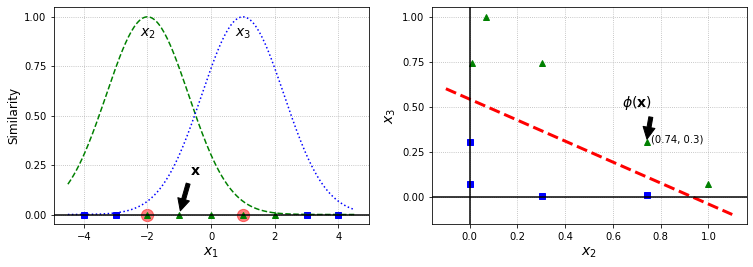

In [359]:
gamma = 0.3

X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

X1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
# 添加两处地标（x_1 = -2 and x_1 = 1）
# 根据这两处地标，求出 X1s 的新特征 X2s, X3s 的钟形函数
X2s = gaussian_rbf(X1s, -2, gamma)
X3s = gaussian_rbf(X1s, 1, gamma)
# 根据原始数据X1D 和 地标，计算新特征
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]


# 绘图
plt.figure(figsize=(11, 4))

plt.subplot(121)
# 不可分离数据
plt.plot(X1D[:, 0][yk == 0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk == 1], np.zeros(5), "g^")

# 高斯RBF 钟形函数
plt.plot(X1s, X2s, "g--")
plt.plot(X1s, X3s, "b:")
# 实例x_1 = -1 标注
plt.annotate(r"$\mathbf{x}$",
            xy=(-1, 0),
            xytext=(-0.5, 0.2),
            arrowprops=dict(facecolor="black", shrink=0.1),
            ha="center",
            fontsize=14)

# 钟形函数标注
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=14)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=14)

# y = 0 线
plt.axhline(y=0, color="k")
# 凸显两个地标
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, color="red")
# 网格
plt.grid(linestyle=":")
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel("Similarity", fontsize=12)
# y轴刻度
plt.yticks([0, 0.25, 0.5, 0.75, 1.00])
# vplt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])


plt.subplot(122)
# 新特征
plt.plot(XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs")
plt.plot(XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^")
# 分割线
plt.plot([-0.1, 1.1], [0.6, -0.1], "r--", linewidth=3)
# 标注 X-1 = -1 的新特征（x2 = 0.74, x3 = 0.30）
plt.annotate(r"$\phi\left(\mathbf{x}\right)$",
            xy=(0.74, 0.30),
            xytext=(0.7, 0.5),
            arrowprops=dict(facecolor="black", shrink=0.11),
            ha="center",
            fontsize=14)
# 新特征的坐标标注
plt.text(0.76, 0.3, "(0.74, 0.3)", ha="left")

# y = 0 线
plt.axhline(y=0, color="k")
# x = 0 线
plt.axvline(x=0, color="k")
# 网格
plt.grid(linestyle=":")
plt.xlabel(r"$x_2$", fontsize=14)
plt.ylabel("$x_3$", fontsize=14)
# y轴刻度
plt.yticks([0, 0.25, 0.5, 0.75, 1.00])
# vplt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])

plt.subplots_adjust(right=1)

print("用高斯BRF的相似特征")
plt.show()

In [360]:
x1_example = X1D[3, 0]  # 实例
for landmark in (-2, 1):  # 两个地标
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)  # 计算新特征
    print("phi({}, {}) = {}".format(x1_example, landmark, k))  # phi(实例， 地标)

phi(-1.0, -2) = [0.74081822]
phi(-1.0, 1) = [0.30119421]


## 高斯 RBF 核函数

In [361]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

使用RBF核的SVM分类器


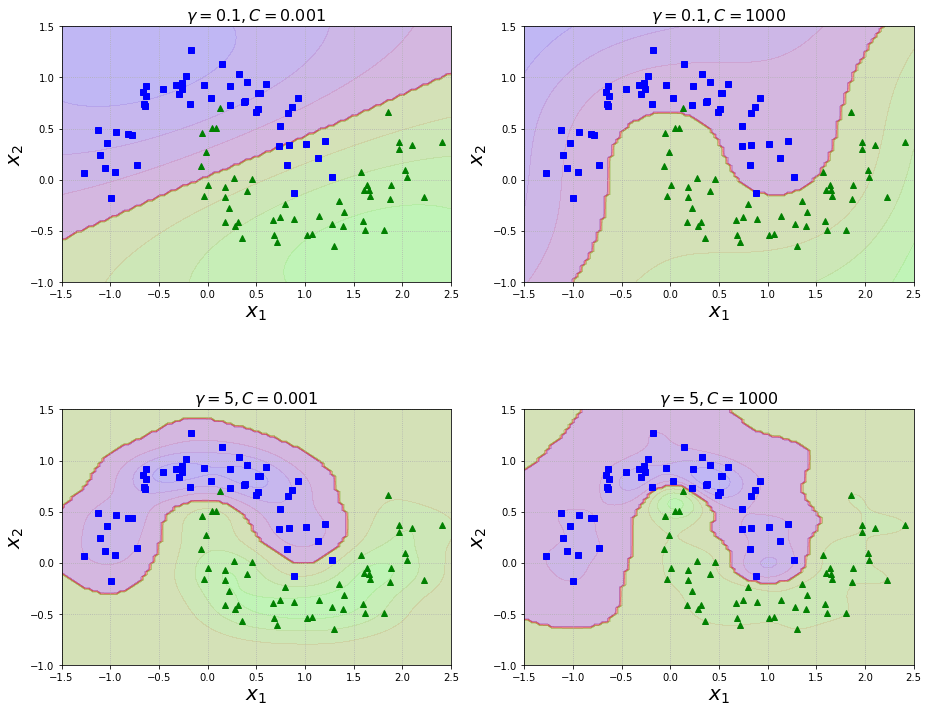

In [369]:
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000

hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)
    

# 绘图
plt.figure(figsize=(13, 10))
for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_dataset(X, y, [-1.5, 2.5, -1.0, 1.5])
    plot_predictions(svm_clf, [-1.5, 2.5, -1.0, 1.5])
    
    gamma, C = hyperparams[i]
    plt.title("$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    
plt.tight_layout()  # 调整整体空白
plt.subplots_adjust(wspace=None, hspace=0.5)  # 调整子图间距  

print("使用RBF核的SVM分类器")
plt.show() 

In [352]:
hyperparams

((0.1, 0.001), (0.1, 1000), (5, 0.001), (5, 1000))

## 计算复杂度

# SVM 回归

## 线性

In [370]:
# 数据初始化
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [371]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [412]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)

svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vector(svm_reg, X, y):
    """寻找支持向量"""
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    
    # Find the indices of array elements that are non-zero, grouped by element. 
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vector(svm_reg1, X, y)
svm_reg2.support_ = find_support_vector(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [413]:
eps_y_pred

array([6.52640746])

In [436]:
def plot_svm_regression(svm_reg, X, y, axes):
    """绘制 SVM 回归"""
    X1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(X1s)
    
    plt.plot(X, y, "bo")
    plt.plot(X1s, y_pred, "k-", linewidth=2, label="$\hat{y}$")
    plt.plot(X1s, y_pred + svm_reg.epsilon, "k--", linewidth=2)
    plt.plot(X1s, y_pred - svm_reg.epsilon, "k--", linewidth=2)
    
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors="#FFAAAA")
    
    
    plt.axis(axes)
    plt.legend(loc="upper left", fontsize=16)   

SVM 回归


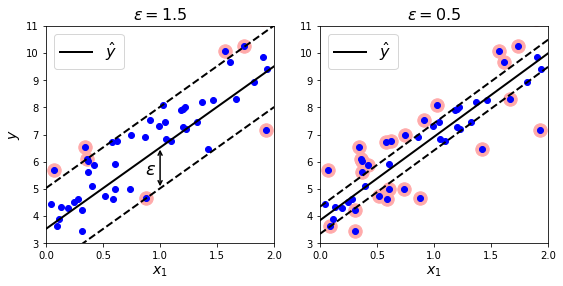

In [438]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
# 箭头
# plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate("",
            xy=(eps_x1, eps_y_pred),
#             xycoords="data",
            xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
#             textcoords="data",
            arrowprops={"arrowstyle": "<->", "linewidth": 1.5})
plt.text(0.87, eps_y_pred - 1, r"$\epsilon$", fontsize=18)

plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=16)

plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])

plt.xlabel(r"$x_1$", fontsize=14)
# plt.ylabel(r"$y$", fontsize=14)
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=16)

print("SVM 回归")
plt.show()

## 非线性

In [444]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [446]:
X.shape, y.shape

((100, 1), (100,))

In [447]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [463]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)

svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

使用二阶多项式核的SVM回归


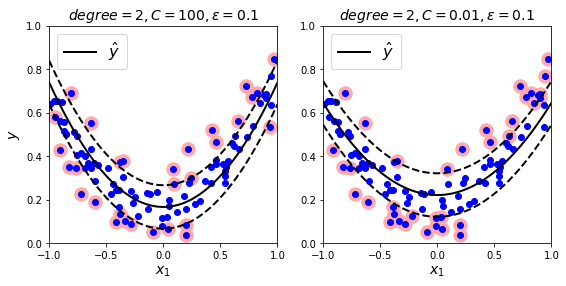

In [464]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg1.degree, 
                                                          svm_poly_reg1.C, 
                                                          svm_poly_reg1.epsilon), fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)

plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon={}$".format(svm_poly_reg2.degree, 
                                                          svm_poly_reg2.C, 
                                                          svm_poly_reg2.epsilon), fontsize=14)
plt.xlabel(r"$x_1$", fontsize=14)

print("使用二阶多项式核的SVM回归")
plt.show()


# 工作原理

## 决策函数和预测

In [465]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

In [526]:
def plot_3D_decision_boundary(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 02.8]):
    """决策函数和预测"""
    # 去除超过边界的数据
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)    
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    # 线性 SVM 分类器预测
    df = (xs.dot(w) + b).reshape(x1.shape)
#     print(df)
    # Matrix or vector norm(范数).
#     print(1 / np.linalg.norm(w))
    # w0*x0 + w1*x1 + b = 0 ==> x1 = -(w0*x0) / w1 - b / w1
    # 决策边界(已知x1 的情况下求解 x2)
    boundary_x2s = - (w[0] * x1s) / w[1] - b[0] / w[1]
    margin_x2s_1 = - (w[0] * x1s) / w[1] - (b[0] - 1) / w[1]
    margin_x2s_2 = - (w[0] * x1s) / w[1] - (b[0] + 1) / w[1]

    ax.plot(x1s, boundary_x2s, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, "k--", linewidth=2)
    
#     ax.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
#     ax.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    ax.plot(X_crop[:, 0][y_crop == 1], X_crop[:, 1][y_crop == 1], "g^")
    ax.plot(X_crop[:, 0][y_crop == 0], X_crop[:, 1][y_crop == 0], "bs")
    
    # Create a surface plot.
    ax.plot_surface(x1, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    # Plot a 3D wireframe.
    ax.plot_wireframe(x1, x2, df, alpha=0.2, color="k")
    ax.text(4.8, 2.8, 8.0, "Decision function $h$", ha="center", fontsize=18)
#     plt.text()
    ax.axis(x1_lim + x2_lim)
    # AttributeError: 'Axes3DSubplot' object has no attribute 'xlabel'
    # ax.xlabel("petal length", fontsize=14)
    # ax.ylabel("petal width", fontsize=14)
    ax.set_xlabel("petal length", fontsize=14)
    ax.set_ylabel("petal width", fontsize=14)
    ax.set_zlabel(r"$h=\mathbf{w}^T \mathbf{x}+b$", fontsize=16)
    ax.legend(loc="upper left", fontsize=16) 

鸢尾花数据集的决策函数


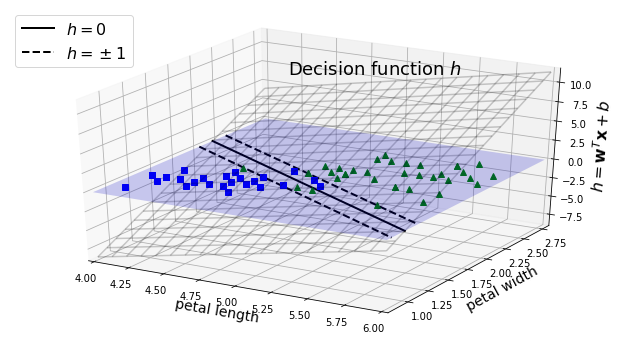

In [535]:
fig = plt.figure(figsize=(11, 6))
# Add an Axes to the figure as part of a subplot arrangement.
ax1 = fig.add_subplot(111, projection="3d")
# svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)
plot_3D_decision_boundary(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

print("鸢尾花数据集的决策函数")
plt.show()

In [530]:
# w: 特征权重向量   b: 偏值项
svm_clf2.coef_[0], svm_clf2.intercept_[0][0] + 1

(array([3.63733359, 6.36552502]), -27.280307924770888)

In [470]:
np.linspace(4, 6, 20)   

array([4.        , 4.10526316, 4.21052632, 4.31578947, 4.42105263,
       4.52631579, 4.63157895, 4.73684211, 4.84210526, 4.94736842,
       5.05263158, 5.15789474, 5.26315789, 5.36842105, 5.47368421,
       5.57894737, 5.68421053, 5.78947368, 5.89473684, 6.        ])

In [489]:
np.zeros_like(np.linspace(4, 6, 20) )

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

# 训练目标

In [551]:
def plot_2D_decision_boundary(w, b, ylabel=True, x1_lim=[-3, 3]):
    """Small weight vector results in a large margin"""
    x1s = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1s + b
    # w 系数（斜率），y 轴间隔 / w = x轴间隔(斜率的倒数)
    m = 1 / w
    
    plt.plot(x1s, y)
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot([-m, -m], [-1, 0], "k--")
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)    
    plt.axhline(y=0, color = "k")
    plt.axvline(x=0, color = "k")
    
    plt.xlabel(r"$x_1$", fontsize=14)
    if ylabel:
        plt.ylabel(r"$w_1x_1$", fontsize=14)
    plt.title("$w_1={}$".format(w), fontsize=16)
    plt.axis(x1_lim + [-2, 2])
    

权重向量越小，间隔越大


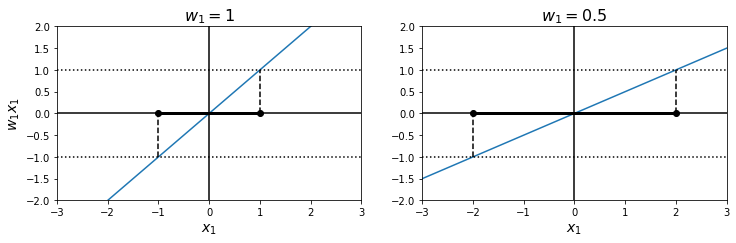

In [553]:
plt.figure(figsize=(12, 3.2))
plt.subplot(121)
# w = 1, b = 0 过原点的一条直线 y = x
plot_2D_decision_boundary(1, 0)

plt.subplot(122)
# w = 0.5, b = 0 过原点的一条直线 y = 0.5x
plot_2D_decision_boundary(0.5, 0, ylabel=False)

print("权重向量越小，间隔越大")
plt.show()

## 二次规划

## 对偶问题

## 核化 SVM

## 在线 SVM

## 损失函数 Hinge

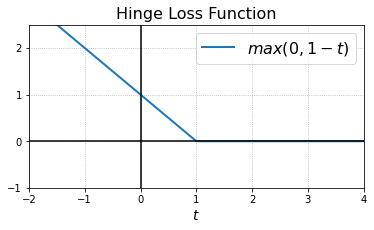

In [568]:
t = np.linspace(-2, 4, 200)
# t = np.array([-1, 0, 2, 3])
# condition：array_like，bool ,当为True时，产生x，否则产生y
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(6, 3))
plt.plot(t, h, linewidth=2, label="$max(0, 1-t)$")
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")

plt.grid(True, which='both', linestyle=":")
plt.xlabel("$t$", fontsize=14)
plt.yticks(np.arange(-1, 2.5, 1))
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.title("Hinge Loss Function", fontsize=16)
plt.show()

In [557]:
h

array([2, 1, 0, 0])

# 练习